In [1]:
import os

path = "data1"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp"]
image_count = 0

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(tuple(image_extensions)):
            image_count += 1

print("Number of images in data1 folder and its subfolders:", image_count)

Number of images in data1 folder and its subfolders: 912


Ce sont des images au format png

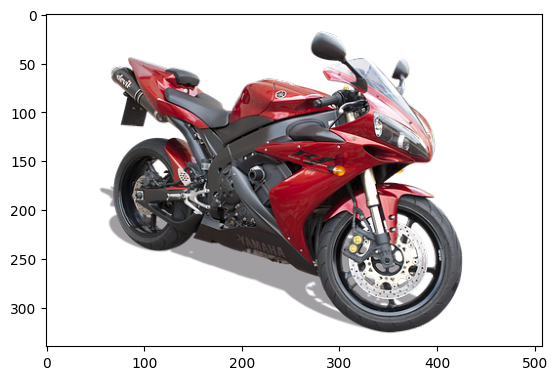

In [2]:
#visualiser une image
import matplotlib.pyplot as plt

img = plt.imread("data1/bike/Bike (1).png")
plt.imshow(img)

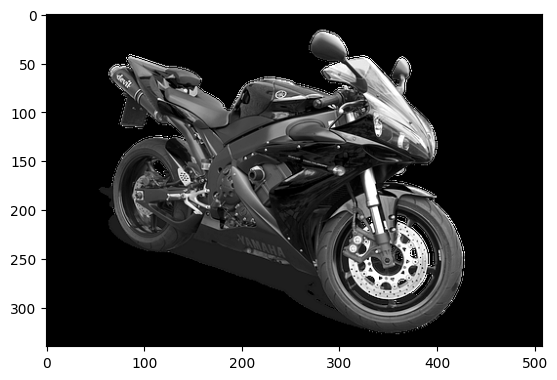

In [3]:
# en noir et blanc
plt.imshow(img[:,:,1], cmap="gray")

In [4]:
bike_folder = "data1/bike"
car_folder = "data1/car"
target_size = (224,224)

import os
import cv2
import numpy as np

def populate_images_and_labels_lists(image_folder_path):
    images = []
    labels = []
    target_size = (224, 224)
    
    for filename in os.listdir(image_folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image = cv2.imread(os.path.join(image_folder_path, filename))
            image = cv2.resize(image, target_size)
            images.append(image)
            
            if "bike" in filename.lower():
                labels.append("bike")
            elif "car" in filename.lower():
                labels.append("car")
    
    return images, labels

In [5]:
bike_images, bike_labels = populate_images_and_labels_lists(bike_folder)
car_images, car_labels = populate_images_and_labels_lists(car_folder)

dataset_images = bike_images + car_images
dataset_labels = bike_labels + car_labels

dataset_images = np.array(object=[image.flatten() for image in dataset_images])

In [6]:
from sklearn.model_selection import train_test_split

dataset_images_train, dataset_images_test, dataset_labels_train, dataset_labels_test = train_test_split(dataset_images, dataset_labels, test_size=0.2, random_state=42)


random state c'est pour definir la seed de random

# 3 Random state 

In [7]:
from sklearn.tree import DecisionTreeClassifier

test_classifier = DecisionTreeClassifier()

test_classifier.fit(dataset_images_train, dataset_labels_train)


DecisionTreeClassifier()

In [8]:
prediction = test_classifier.predict([dataset_images_train[0]])
print("Prediction:", prediction, "label:", dataset_labels_train[0])

Prediction: ['bike'] label: bike


In [9]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(dataset_images_train, dataset_labels_train)

SVC()

In [10]:
prediction = svm_classifier.predict([dataset_images_train[0]])
print("Prediction:", prediction, "label:", dataset_labels_train[0])

Prediction: ['bike'] label: bike


## Évaluation de l'accuracy

In [11]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of model 1
test_classifier_pred = test_classifier.predict(dataset_images_test)
model1_acc = accuracy_score(dataset_labels_test, y_pred=test_classifier_pred)

# Calculate accuracy of model 2
svm_classifier_pred = svm_classifier.predict(dataset_images_test)
model2_acc = accuracy_score(dataset_labels_test, svm_classifier_pred)

print("Decision tree accuracy:", model1_acc)
print(" 2 accuracy:", model2_acc)

Decision tree accuracy: 0.9180327868852459
 2 accuracy: 0.9726775956284153


In [12]:
from sklearn.metrics import confusion_matrix

test_classifier_pred = test_classifier.predict(dataset_images_test)
confusion_matrix(dataset_labels_test, test_classifier_pred, labels=["bike", "car"])


array([[89,  5],
       [10, 79]])

Il y as 89 bikes qui ont été classifiés comme des bikes et 5 classifiés comme des cars


Il y a 82 car qui ont été classifiés comme des car et 7 comme des bikes

In [13]:
svm_classifier_pred = svm_classifier.predict(dataset_images_test)
confusion_matrix(dataset_labels_test, svm_classifier_pred, labels=["bike", "car"])

array([[90,  4],
       [ 1, 88]])

Il y as 90 bikes qui ont été classifiés comme des bikes et 4 classifiés comme des cars


Il y a 88 car qui ont été classifiés comme des car et 1 comme des bikes

### Bonus

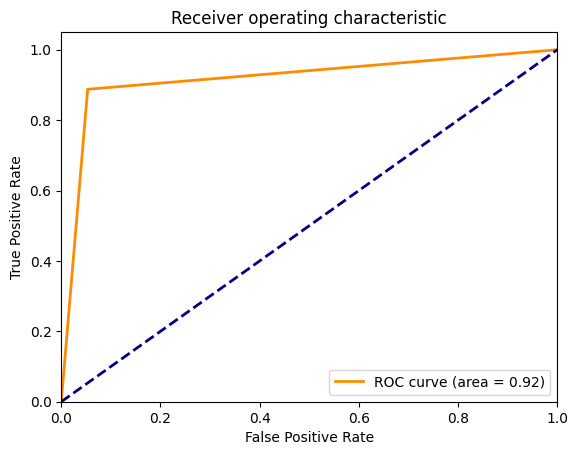

In [14]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

# Calculate precision and recall
model1_pred = test_classifier.predict(dataset_images_test)
model1_precision = precision_score(dataset_labels_test, model1_pred,pos_label="car")
model1_recall = recall_score(dataset_labels_test, model1_pred,pos_label="car")

# Plot ROC curve
model1_probs = test_classifier.predict_proba(dataset_images_test)[:, 1]
fpr, tpr, thresholds = roc_curve(dataset_labels_test, model1_probs,pos_label="car")
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
print(roc_auc)

0.91722448003825


# Partie 4 

In [16]:
test_classifier.get_depth()

9

In [17]:
max_depth_list = [i for i in range(1, 12)]
train_accuracy = []
test_accuracy = []

for i in max_depth_list:
    test_classifier = DecisionTreeClassifier(max_depth=i)
    test_classifier.fit(dataset_images_train, dataset_labels_train)
    
    train_accuracy.append(test_classifier.score(dataset_images_train, dataset_labels_train))
    test_accuracy.append(test_classifier.score(dataset_images_test, dataset_labels_test))

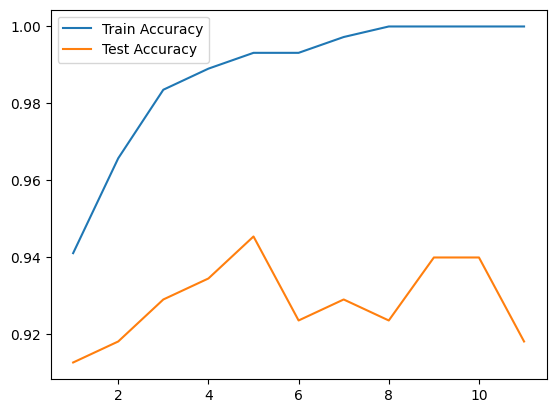

In [18]:
plt.plot(max_depth_list, train_accuracy, label="Train Accuracy")
plt.plot(max_depth_list, test_accuracy, label="Test Accuracy")
plt.legend()
plt.show()

Il faut choisir la meilleure valeur pour le test accuracy => max_depth = 5

## Fine tuning du modèle 2

### On fait pareil pour kernel et degree

In [29]:
print(svm_classifier.get_params()["kernel"], "kernel")
print(svm_classifier.get_params()["degree"], "degree")

rbf kernel
3 degree


In [31]:
kernels_lists = [i for i in range(1, 12)]

linear_svm_classifier = SVC(kernel="linear")
poly_svm_classifier = SVC(kernel="poly")
rbf_svm_classifier = SVC(kernel="rbf")
sigmoid_svm_classifier = SVC(kernel="sigmoid")

linear_svm_classifier.fit(dataset_images_train, dataset_labels_train)
poly_svm_classifier.fit(dataset_images_train, dataset_labels_train)
rbf_svm_classifier.fit(dataset_images_train, dataset_labels_train)
sigmoid_svm_classifier.fit(dataset_images_train, dataset_labels_train)

linear_svm_score = linear_svm_classifier.score(dataset_images_test, dataset_labels_test)
poly_svm_score = poly_svm_classifier.score(dataset_images_test, dataset_labels_test)
rbf_svm_score = rbf_svm_classifier.score(dataset_images_test, dataset_labels_test)
sigmoid_svm_score = sigmoid_svm_classifier.score(dataset_images_test, dataset_labels_test)

print("Linear SVM score:", linear_svm_score)
print("Polynomial SVM score:", poly_svm_score)
print("RBF SVM score:", rbf_svm_score)
print("Sigmoid SVM score:", sigmoid_svm_score)

Linear SVM score: 0.9344262295081968
Polynomial SVM score: 0.9453551912568307
RBF SVM score: 0.9726775956284153
Sigmoid SVM score: 0.12568306010928962


les scores de linear, polynomial et rbf sont dans le même ordre de grandeur, regardons si on peut augementer le poly en modelant le degré

In [32]:
dregree_list = [i for i in range(1, 12)]
degree_train_accuracy = []
degree_test_accuracy = []

for i in dregree_list:
    test_classifier_svm = SVC(kernel="poly", degree=i)
    test_classifier_svm.fit(dataset_images_train, dataset_labels_train)
    
    degree_train_accuracy.append(test_classifier.score(dataset_images_train, dataset_labels_train))
    degree_test_accuracy.append(test_classifier.score(dataset_images_test, dataset_labels_test))

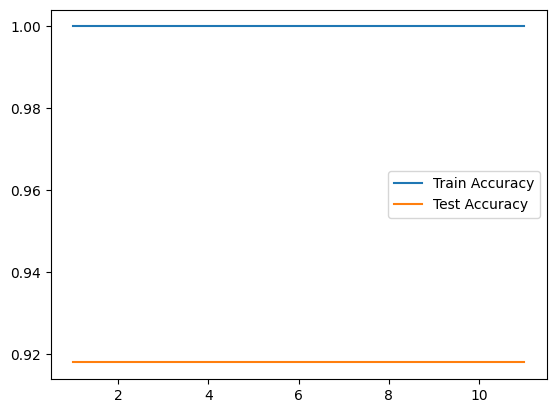

In [33]:
plt.plot(dregree_list, degree_train_accuracy, label="Train Accuracy")
plt.plot(dregree_list, degree_test_accuracy, label="Test Accuracy")
plt.legend()
plt.show()

On constate que le degré du modèle est décorelé de l'accuracy du model.
On en déduit que ici le meilleur kernel est le **rbf**

### Validation

In [40]:

bike_images_valid, bike_labels_valid = populate_images_and_labels_lists("val/bike/")
car_images_valid, car_labels_valid = populate_images_and_labels_lists("val/car/")

val_images = bike_images_valid + car_images_valid
val_images = np.array(object=[image.flatten() for image in val_images])
val_labels = bike_labels_valid + car_labels_valid

test_classifier = DecisionTreeClassifier(max_depth=5)
test_classifier.fit(dataset_images_train, dataset_labels_train)

score = test_classifier.score(val_images, val_labels)
print("Validation score:", score)

Validation score: 0.07692307692307693


Ce scrore est extremmement bas, ce qui traduit un biais dans les données d'entrainenement, toutes mes motos sont sur fond blanc alors que les voitures sont sur fond divers

In [44]:
def get_label_from_filename(filename):
    if "bike" in filename.lower():
        return "bike"
    elif "car" in filename.lower():
        return "car"

def populate_and_augment_images_and_labels_lists(image_folder_path):
    images = []
    labels = []
    target_size = (224, 224)
    
    for filename in os.listdir(image_folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image = cv2.imread(os.path.join(image_folder_path, filename))
            image = cv2.resize(image, target_size)
            
            # Cropping transformation
            cropped_image = image[48:162, 48:162]
            cropped_image = cv2.resize(cropped_image, target_size)
            images.append(cropped_image)
            labels.append(get_label_from_filename(filename))
            
            # Grayscale transformation
            grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            grey_image = cv2.cvtColor(grey_image, cv2.COLOR_GRAY2BGR)
            images.append(grey_image)
            labels.append(get_label_from_filename(filename))
    
    return images, labels


In [45]:
bike_images, bike_labels = populate_and_augment_images_and_labels_lists("data1/bike/")
car_images, car_labels = populate_and_augment_images_and_labels_lists("data1/car/")

dataset_images = bike_images + car_images
dataset_labels = bike_labels + car_labels

dataset_images = np.array(object=[image.flatten() for image in dataset_images])

dataset_images_train, dataset_images_test, dataset_labels_train, dataset_labels_test = train_test_split(dataset_images, dataset_labels, test_size=0.2, random_state=42)

test_classifier = DecisionTreeClassifier(max_depth=5)
test_classifier.fit(dataset_images_train, dataset_labels_train)

score = test_classifier.score(val_images, val_labels)
print("Validation score:", score)

Validation score: 0.10576923076923077


Essayons de reduire le biais avec des images prises sur kaggle https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset/data

In [52]:
bike_images, bike_labels = populate_images_and_labels_lists("data1/augmented_bike/")
car_images, car_labels = populate_images_and_labels_lists("data1/car/")

dataset_images = bike_images + car_images
dataset_labels = bike_labels + car_labels

dataset_images = np.array(object=[image.flatten() for image in dataset_images])

dataset_images_train, dataset_images_test, dataset_labels_train, dataset_labels_test = train_test_split(dataset_images, dataset_labels, test_size=0.2, random_state=42)

test_classifier = DecisionTreeClassifier(max_depth=5)
test_classifier.fit(dataset_images_train, dataset_labels_train)

score = test_classifier.score(val_images, val_labels)
print("Validation score:", score)

Validation score: 0.5192307692307693


On remaqure que l'accuracy s'est nettement ameliorée, ce qui traduit que les images d'entrées étaient effectivement biaisées.